In [4]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf71b2aaab5e4141bd379fd5c105495e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aww_kf0s9e03RTzwf54jMdXl1Y1iwe1QRyYfYGxPNqbU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='classificationbadge-donotdelete-pr-vmhhva7c7pxdjl',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Diabetes = pd.read_csv(body)
Diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [5]:
Diabetes_copy = Diabetes.copy(deep = True)
Diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(Diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Diabetes                      0
dtype: int64


In [8]:
Diabetes["Diabetes"] = pd.get_dummies(Diabetes["Diabetes"], drop_first = True)


In [9]:
print(Diabetes["Diabetes"])

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Diabetes, Length: 768, dtype: uint8


In [10]:
from sklearn.model_selection import train_test_split
X=Diabetes.drop("Diabetes", axis=1)
y=Diabetes[["Diabetes"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [12]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.7835497835497836

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[128,  18],
       [ 32,  53]])

In [17]:
import sklearn.metrics as metrics
fpr, tpr, threashhold =  metrics.roc_curve(y_test,y_pred)

In [18]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7501208702659146

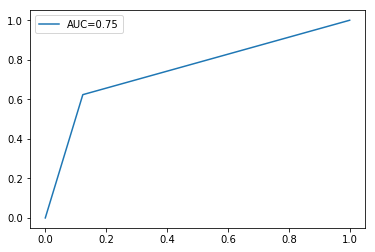

In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend()
plt.show()